<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

Note:  This material largely follows the text "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997) and is meant as a guide and supplement to the material presented there.

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Eigenproblems

## Overview

We will now consider eigenproblems of the form
$$
    A x = \lambda x
$$
where $A \in \mathbb C^{m \times m}$, $x \in \mathbb C^m$ and $\lambda \in \mathbb C$.  The vector $x$ is known as the **eigenvector** and $\lambda$ the **eigenvalue**.  The set of all eigenvalues is called the **spectrum** of $A$.

### Characteristic Polynomial

The **characteristic polynomial** of a matrix $A$ is the polynomial $\mathcal{P}_A(z)$ defined by
$$
    \mathcal{P}_A(z) = \det(z I - A).
$$

We can then state the following theorem regarding the zeros of $\mathcal{P}_A$ and the eigenvalues of $A$:

*Theorem:* $\lambda$ is an eigenvalue of $A$ if and only if $\mathcal{P}_A(\lambda) = 0$.

*Proof:* 
\begin{align*}
    \text{If}~\lambda~\text{is an eigenvalue of}~A &\Leftrightarrow \text{there is a non-zero vector}~x~\text{s.t.} ~\lambda x - A x = 0 \\
    &\Leftrightarrow \lambda I - A ~\text{is singular (since }x~\text{is a non-trivial vector in the null space of}~ \lambda I - A) \\
    &\Leftrightarrow \det(\lambda I - A) = 0
\end{align*}

Note that this theorem implies that even though $A \in \mathbb R^{m \times m}$ that $\lambda \in \mathbb C$.

### Eigenvalue Decomposition
Similar to QR factorization, an eigendecomposition is possible such that $A$ can be written as
$$
    A = X \Lambda X^{-1}
$$
where $X$ is the matrix formed by the eigenvectors $x$ as its columns and $\Lambda$ is a diagonal matrix with the eigenvalues along its diagonal.  

This equation comes from the similar equation $A X = X \Lambda$ which is of course related to the original problem statement.  This latter equation can be written out as

$$
    \begin{bmatrix} 
        ~ & ~ & ~ & ~ & ~ \\
        ~ & ~ & ~ & ~ & ~ \\
        ~ & ~ & A & ~ & ~ \\
        ~ & ~ & ~ & ~ & ~ \\
        ~ & ~ & ~ & ~ & ~
    \end{bmatrix}
    \begin{bmatrix} 
        ~ & ~ & ~ & ~ & ~ \\
        ~ & ~ & ~ & ~ & ~ \\
        x_1 & x_2 & \cdots & x_{m-1} & x_m \\
        ~ & ~ & ~ & ~ & ~ \\
        ~ & ~ & ~ & ~ & ~
    \end{bmatrix} = 
    \begin{bmatrix} 
        ~ & ~ & ~ & ~ & ~ \\
        ~ & ~ & ~ & ~ & ~ \\
        x_1 & x_2 & \cdots & x_{m-1} & x_m \\
        ~ & ~ & ~ & ~ & ~ \\
        ~ & ~ & ~ & ~ & ~
    \end{bmatrix}
    \begin{bmatrix} 
        \lambda_1 & ~ & ~ & ~ & ~ \\
        ~ & \lambda_2 & ~ & ~ & ~ \\
        ~ & ~ & \ddots & ~ & ~ \\
        ~ & ~ & ~ & \lambda_{m-1} & ~ \\
        ~ & ~ & ~ & ~ & \lambda_m
    \end{bmatrix}
$$

Here we note that the eigenpair $(x_j, \lambda_j)$ are matched as the $j$th column of $X$ and the $j$th element of $\Lambda$ on the diagonal.  

Also note that repeated eigenvalues belonging to different eigenvectors (that are linearly independent) will appear multiple times along the diagonal.  This defined the **geometric multiplicity** of $\lambda$.  

The other kind of multiplicity is **algebraic multiplicity** which is the number of times overall an eigenvalue repeats itself.

### Interpretations of the Eigenspace

One way to interpret the eigenproblem is that of one that tries to find the subspaces of $\mathbb C^m$ that act like scalar multiplication by $\lambda$.  Since any multiple of a particular eigenvector $x$ is also an eigenvector we define the eigenspace as the space $S$ of eigenvectors $x \in S$ that correspond to a single eigenvalue.  Due to geometric multiplicity note that these spaces can have $m > 1$.

### Example:  Computing Multiplicities

Compute the geometric and algebraic multiplicities for the following matrices.  What is the relationship between the algebraic and geometric multiplicities?

1. $A = 2 \cdot I$
1. $B = \begin{bmatrix} 2 & 1 & ~ \\ ~ & 2 & 1 \\ ~ & ~ & 2 \end{bmatrix}$

1. The characteristic polynomial of $A$ is
  $$\mathcal{P}_A(z) = (2 - z)(2 - z)(2 - z) = (2 - z)^3$$
  so the eigenvalues are all $\lambda = 2$ so we know the algebraic multiplicity is 3 of this eigenvalue.  The geometric multiplicity is deterimined by the number of linearly independent eigenvectors.  For this matrix we have three eigenvectors that are all linearly independent which happen to be the unit vectors in each direction (check!).  This means that the geometric multiplicity is also 3.

1. The characteristic polynomial of $B$ is the same as $A$ so again we know $\lambda = 2$ but know we need to be a bit careful about the eigenvectors.  In this case the only eigenvector is a scalar multiple of $e_1$ so the geometric multiplicity is 1.

When an eigenvalue has algebraic multiplicity that equals its geometric then it is called non-defective and otherwise defective.  This property is also inherited to the matrix so in the above example $A$ and $B$ are non-defective and defective matrices respectively.

### Determinant and Trace

Two important properties of matrices have important relationships with their eigenvalues, namely the determinant and trace.  The determinant we have seen, the **trace** is defined as the sum of the elements on the diagonal of a matrix, in other words
$$
    \text{tr}(A) := \sum^m_{i=1} A_{ii}.
$$

The relationship between the determinant and the eigenvalues is not difficult to guess due to the nature of the characteristic polynomial.  The trace of a diagonal matrix is clear and provides another suggestion to the relationship.

*Theorem:* The determinant $\det(A)$ and trace $\text{tr}(A)$ are equal to the product and sum of the eigenvalues of $A$ respectively counting algebraic multiplicity.

### Similarity Transformations

This fact is due to the nature of a special kind of transformation called similarity transformations.  A **similarity transformation** is defined as a transformation that takes A and maps it to $X^{-1} A X$ (assuming $X$ is non-singular).  Two matrices are said to be **similar** if there is a similarity transformation between them.  

The most important property of similar matrices is that they have the same characteristic polynomial, eigenvalues, and multiplicities.

This allows us to relate geometric and algebraic multiplicity as 

*Theorem:* The algebraic multiplicity of an eigenvalue $\lambda$ is at least as great as its geometric multiplicity.

### Schur Factorization

A **Schur factorization** of a matrix $A$ is defined as
$$
    A = Q T Q^\ast
$$
where $Q$ is unitary and $T$ is upper-triangular.  In particular note that due do the structure of the resulting characteristic polynomial that $A$ and $T$ have identical eigenvalues (check!).

The importance of similarity transforms is readily apparent from the definition of a Schur factorization which is clearly a similarity transformation due to the unitary matrix $Q$.

*Theorem:* Every matrix $A \in \mathbb C^{m \times m}$ has a Schur factorization.

Note that the above results imply the following
 - An eigen-decomposition $A = X \Lambda X^{-1}$ exists if and only if $A$ is non-defective
 - A unitary transformation $A = Q \Lambda Q^\ast$ exists if and only if $A$ is normal
 - A Schur factorization always exists
 
Note that each of these lead to a means for isolating the eigenvalues of a matrix and will be useful when considering algorithms for finding them.

## Computing Eigenvalues

The most obvious approach to computing eigenvalues is a direct computation of the roots of the characteristic polynomial.  Unfortunately the following theorem rains on our parade:

*Theorem:* For an $m \geq 5$ there is a polynomial $\mathcal{P}(z)$ of degree $m$ with rational coefficients that has a real root $\mathcal{P}(z_0) = 0$ with the property that $z_0$ cannot be written using any expression involving rational numbers, addition, subtraction, multiplication, division, and $k$th roots.

Not all is lost however, we just cannot use any direct methods to solve for the eigenvalues.  Instead we must use an iterative approach, in other words we want to construct a sequence that converges to the eigenvalues.

Almost all approaches to computing eigenvalues do so through the computation of the Schur factorization.  The Schur factorization as we have seen will preserve the eigenvalues.  The steps to compute the Schur factorization are usually broken down into two steps
1. Directly transform $A$ into a **Hessenberg** matrix, a matrix that contains zeros below its first sub-diagonal, directly using Householder reflections.
1. Use an iterative method to change the sub-diagonal into all zeros

### Hessenberg and Tridiagonal form

What we want to do is construct a sequence of unitary matrices that turns $A$ into a Hessenberg matrix to start.  We can use Householder reflections to do this with the important distinction that we only want to remove zeros below the first sub-diagonal.  The sequence would look something like

$$
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x}
    \end{bmatrix} \overset{Q_1}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x}
    \end{bmatrix} \overset{Q_2}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} 
    \end{bmatrix} \overset{Q_3}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} \\
        0 & 0 & 0 & \text{x} & \text{x}
    \end{bmatrix}
$$

so we have the sequence $Q^\ast_1 A Q_1$.  Note we need both to preserve the entries of the first column that are not being transformed to zeros.

One important special case of this sequence of transformations is that if the matrix $A$ is hermitian (the matrix is its own conjugate transpose, $A = A^\ast$) then the Hessenberg matrix is tridiagonal.

We now will focus on how to formulate the iteration step of the eigenproblem.  We will also restrict our attention to symmetric, real matrices.  This implies that all eigenvalues will be real and have a complete set of orthogonal eigenvectors.  Generalizations can be made of many of the following algorithms but is beyond the scope of this class.

## Rayleigh Quotient and Inverse Iteration

There are a number of classic approaches to computing the iterative step above which we will review here.  Inverse power iteration in particular is today still the dominant means of finding the eigenvectors once the eigenvalues are known.

### Rayleigh Quotient

The **Rayleigh quotient** of a vector $x \in \mathbb R^m$ is the scalar
$$
    r(x) = \frac{x^T A x}{x^T x}.
$$
The importance of the Rayleigh quotient arrives when we evaluate $r(x)$ at an eigenvector.  When this is the case the quotient evaluates to the corresponding eigenvalue.  

The Rayleigh quotient can be motivated by asking the question, given an eigenvector $x$, what value $\alpha$ acts 
most like an eigenvalue

$$
    \min_\alpha ||A x - \alpha x||_2.
$$

This can of course be formulated as a least-squares problem noting that $\alpha$ is the unknown vector and $Ax$ is the right-hand side so we have

$$
    x^T x \alpha = x^T A x
$$

which can be solved so that

$$
    \alpha = r(x) = \frac{x^T A x}{x^T x}.
$$

### Power Iteration

Power iteration is a straight forward approach to finding the eigenvector of the largest eigenvalue of $A$.  The basic idea is that the sequence
$$
    \frac{x}{||x||}, \frac{Ax}{||Ax||}, \frac{A^2x}{||A^2x||}, \frac{A^3x}{||A^3x||}, \ldots
$$
will converge (although very slowly) to the desired eigenvector.

We implement this method by initializing the algorithm with some vector $v$ with $||v|| = 1$.  We then apply the sequence of multiplications.

The reason why this works can be seen by considering the initial vector $v$ as a linear combination of the orthonormal eigenvectors (which we have assumed exist) such that

$$
    v^{(0)} = a_1 q_1 + a_2 q_2 + \cdots + a_m q_m.
$$
Multiplying $v^{(0)}$ by $A$ then leads to

\begin{align*}
    Av^{(0)} = v^{(1)} &= a_1 A q_1 + a_2 A q_2 + \cdots + a_m A q_m \\
    &= c_1 (a_1 \lambda_1 q_1 + a_2 \lambda_2 q_2 + \cdots + a_m \lambda_m q_m) \\
\end{align*}

where $c_1$ is some constant due to the fact the eigenvectors are not uniquely specified.  Repeating this $k$ times we have

\begin{align*}
    Av^{(k-1)} = v^{(k)} &= a_1 A^k q_1 + a_2 A^k q_2 + \cdots + a_m A^k q_m \\
    &= c_k (a_1 \lambda_1^k q_1 + a_2 \lambda_2^k q_2 + \cdots + a_m \lambda_m^k q_m) \\
    &= c_k \lambda_1^k \left(a_1 q_1 + a_2 \frac{\lambda_2^k}{\lambda_1^k} q_2 + \cdots + a_m \frac{\lambda_m^k}{\lambda_1^k} q_m \right)
\end{align*}

Since $\lambda_1 > \lambda_i$ for all $i \neq 1$ then in the limit the terms $\lambda_2^k / \lambda_1^k$ will approach zero.

### Inverse Iteration

Inverse iteration uses a similar approach with the difference that we can use to find any of the eigenvectors for the matrix $A$.  Consider the matrix $(A - \mu I)^{-1}$, the eigenvectors of this matrix are the same as $A$ with the eigenvalues $(\lambda_j - \mu)^{-1}$ where $\lambda_j$ are the eigenvalues of $A$.  If $\mu$ is close to a particular $\lambda_j$, say $\lambda_J$, then $(\lambda_J - \mu)^{-1}$ will be larger than any of the other $(\lambda_j - \mu)^{-1}$.  In this way we effectively have picked out the eigenvalue we want to consider in the power iteration!

### Rayleigh Quotient Iteration

By themselves the above approaches are not particularly useful but combining them we can iterate back and forth to find the eigenvalue, eigenvector pair:
1. Compute the Rayleigh quotient and find an estimate for $\lambda_j$
1. Compute one step of inverse iteration to approximate $x_j$
1. Repeat...

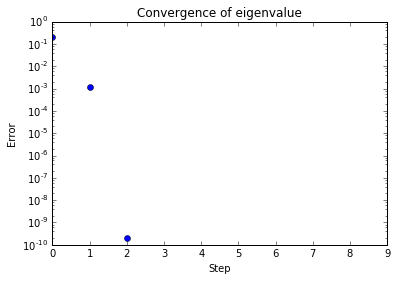

In [2]:
m = 3
A = numpy.array([[2, 1, 1], [1, 3, 1], [1, 1, 4]])

num_steps = 10
v = numpy.empty((num_steps, m))
lam = numpy.empty(num_steps)

v[0, :] = numpy.array([1, 1, 1])
v[0, :] = v[0, :] / numpy.linalg.norm(v[0, :], ord=2)
lam[0] = numpy.dot(v[0,:], numpy.dot(A, v[0, :]))
for k in xrange(1, num_steps):
    w = numpy.linalg.solve(A - lam[k-1] * numpy.identity(m), v[k-1, :])
    v[k, :] = w / numpy.linalg.norm(w, ord=2)
    lam[k] = numpy.dot(v[k,:], numpy.dot(A, v[k, :]))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(10), numpy.abs(lam - numpy.linalg.eigvals(A)[0]), 'o')

axes.set_title("Convergence of eigenvalue")
axes.set_xlabel("Step")
axes.set_ylabel("Error")

plt.show()

## QR Algorithm

The most basic use of a $QR$ factorization to find eigenvalues is to iteratively compute the factorization and multiply the resulting $Q$ and $R$ in the reverse order.  This sequence will eventually converge to the Schur decomposition of the matrix $A$.

In [3]:
%precision 6
m = 3
A = numpy.array([[2, 1, 1], [1, 3, 1], [1, 1, 4]])
MAX_STEPS = 10

for i in xrange(MAX_STEPS):
    Q, R = numpy.linalg.qr(A)
    A = numpy.dot(R, Q)
    print A

print "True eigenvalues: "
print numpy.linalg.eigvals(A)
print "Computed eigenvalues: "
for i in xrange(m):
    print A[i, i]

[[  4.166667e+00   1.095445e+00  -1.267105e+00]
 [  1.095445e+00   2.000000e+00  -1.395822e-17]
 [ -1.267105e+00   1.194656e-16   2.833333e+00]]
[[ 5.090909  0.15743   0.623249]
 [ 0.15743   1.86182  -0.54704 ]
 [ 0.623249 -0.54704   2.047271]]
[[ 5.198682 -0.075903 -0.207275]
 [-0.075903  2.181835  0.496554]
 [-0.207275  0.496554  1.619484]]
[[ 5.211648 -0.065892  0.058223]
 [-0.065892  2.363696 -0.321368]
 [ 0.058223 -0.321368  1.424655]]
[[ 5.213778 -0.035826 -0.01528 ]
 [-0.035826  2.430805  0.183737]
 [-0.01528   0.183737  1.355417]]
[[  5.214202e+00  -1.758371e-02   3.920120e-03]
 [ -1.758371e-02   2.451920e+00  -1.007513e-01]
 [  3.920120e-03  -1.007513e-01   1.333877e+00]]
[[  5.214294e+00  -8.392060e-03  -9.988671e-04]
 [ -8.392060e-03   2.458212e+00   5.453885e-02]
 [ -9.988671e-04   5.453885e-02   1.327494e+00]]
[[  5.214314e+00  -3.973357e-03   2.540044e-04]
 [ -3.973357e-03   2.460055e+00  -2.940989e-02]
 [  2.540044e-04  -2.940989e-02   1.325631e+00]]
[[  5.214318e+00  -1

So why does this work?  The first step is to find the $QR$ factorization of $A^{(k-1)}$ which is equivalent to finding
$$
    (Q^{(k)})^T A^{(k-1)} = R^{(k)}
$$
and multiplying on the right leads to
$$
    (Q^{(k)})^T A^{(k-1)} Q^{(k)} = R^{(k)} Q^{(k)}.
$$

In this way we can see that this is a similarity transformation of the matrix $A^{(k-1)}$ since the $Q^{(k)}$ is an orthogonal matrix ($Q^{-1} = Q^T$). This of course is not a great idea to do directly but works great in this case as we iterate to find the upper triangular matrix $R^{(k)}$ which is exactly where the eigenvalues appear.

In practice this basic algorithm is modified to include a few additions:

1. Before starting the iteration $A$ is reduced to tridiagonal form.
1. Motivated by the inverse power iteration we observed we instead consider a shifted matrix $A^{(k)} - \mu^{(k)} I$ for factoring.  The $\mu$ picked is related to the estimate given by the Rayleigh quotient.  Here we have
$$
    \mu^{(k)} = \frac{(q_m^{(k)})^T A q_m^{(k)}}{(q_m^{(k)})^T q_m^{(k)}} = (q_m^{(k)})^T A q_m^{(k)}.
$$
1. Deflation is used to reduce the matrix $A^{(k)}$ into smaller matrices once (or when we are close to) finding an eigenvalue to simplify the problem.

This has been the standard approach until recently for finding eigenvalues of a matrix.

## Alternatives

### Jacobi

Jacobi iteration employs the idea that we know directly the eigenvalues of a matrix of size equal to or less than 4 (we know the roots of the characteristic polynomial directly).  Jacobi iteration therefore attempts to break the matrix down into at most 4 by 4 matrices along the diagonal via a series of similarity transformations based on only diagonalizing sub-matrices 4 by 4 or smaller.

### Bisection 

It turns out if you do not want all of the eigenvalues of a matrix that using a bisection method to find some subset of the eigenvalues is often the most efficient way to get these.  This avoids the pitfall of trying to find the eigenvalues via other root-finding approaches by only needing evaluations of the function and if a suitable initial guess is provided can find the eigenvalue quickly that is closest to the initial bracket provided.

### Divide-and-conquer

This algorithm is actually the one used most often used if both eigenvalues and eigenvectors are needed and performs up to twice as fast as the $QR$ approach.  The basic idea is to split the matrix into two pieces at every iteration by introducing zeros on the appropriate off-diagonals which neatly divides the problem into two pieces.